# Thermal Image Analysis

🚨 Emergency Alert! 🚨



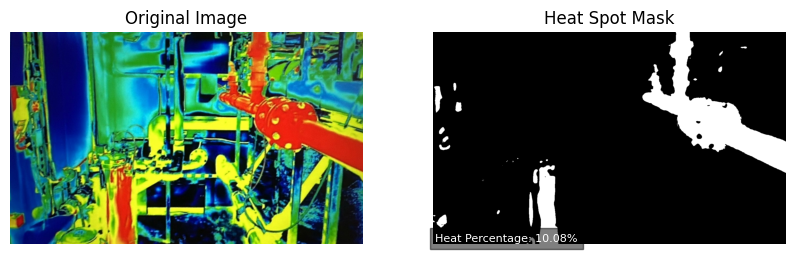

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def check_heat_spot(image_path, threshold_percentage=1):
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_heat = np.array([0, 120, 70])
    upper_heat = np.array([25, 255, 255])
    heat_mask = cv2.inRange(hsv_image, lower_heat, upper_heat)
    total_pixels = image.shape[0] * image.shape[1]
    heat_pixels = np.sum(heat_mask > 0)
    heat_percentage = (heat_pixels / total_pixels) * 100

    if heat_percentage > threshold_percentage:
        print("🚨 Emergency Alert! 🚨\n")
    else:
        print("Stable Condition\n")

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(heat_mask, cmap='gray')
    plt.title("Heat Spot Mask")
    plt.axis("off")

    plt.text(10, heat_mask.shape[0] - 10, f'Heat Percentage: {heat_percentage:.2f}%', fontsize=8, color='white', bbox=dict(facecolor='black', alpha=0.5))

    plt.show()

image_path = '/content/Thermal Image.jpeg'
result = check_heat_spot(image_path, threshold_percentage=0.1)

# Thermal Imaging Video Analysis

Image at Second: 1 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 2 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 3 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 4 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 5 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 6 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 7 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 8 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 9 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 10 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 11 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 12 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 13 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 14 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 15 analyzed. Estimated Heat percentage = 0.00%
Image at Second: 16 analyzed. Estimated Heat perc

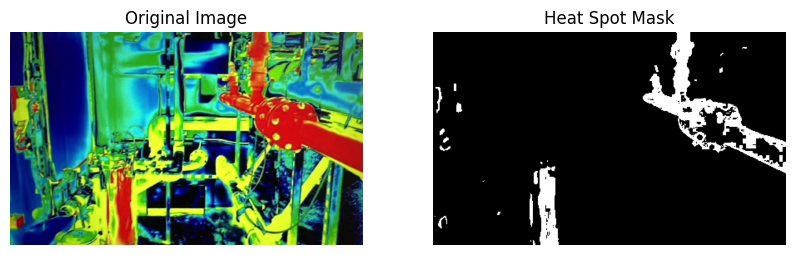

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pytz
from datetime import datetime

def check_heat_spot(image, threshold_percentage=0.1):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    lower_heat = np.array([0, 120, 70])
    upper_heat = np.array([25, 255, 255])
    heat_mask = cv2.inRange(hsv_image, lower_heat, upper_heat)
    total_pixels = image.shape[0] * image.shape[1]
    heat_pixels = np.sum(heat_mask > 0)
    heat_percentage = (heat_pixels / total_pixels) * 100
    return heat_percentage, image_rgb, heat_mask

def display_images(original_image, heat_mask):
    print("\nCaptured Frame of Video:")
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(original_image)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(heat_mask, cmap='gray')
    plt.title("Heat Spot Mask")
    plt.axis("off")
    plt.show()

def print_current_time():
    singapore_tz = pytz.timezone('Asia/Singapore')
    current_time = datetime.now(singapore_tz)
    print("Time of analysis (SGT):", current_time.strftime("%Y-%m-%d %H:%M:%S"), "(YYYY-MM-DD HH:MM:SS)")

def process_video(video_path, threshold_percentage=0.1):
    video = cv2.VideoCapture(video_path)

    fps = video.get(cv2.CAP_PROP_FPS)
    frame_interval = int(fps)

    success, frame = video.read()
    if not success:
        print("Problem with Analysis: Unable to read frames from the video.")
        video.release()
        return

    frame_count = 0
    last_image_rgb = None
    last_heat_mask = None
    heat_spot_found = False

    while success:
        if frame_count % frame_interval == 0:
            heat_percentage, image_rgb, heat_mask = check_heat_spot(frame, threshold_percentage)
            print(f"Image at Second: {frame_count // frame_interval + 1} analyzed. Estimated Heat percentage = {heat_percentage:.2f}%")
            if heat_percentage > threshold_percentage:
                print("\n🚨 Emergency Alert! 🚨")
                print_current_time()
                print(f"Image at Second: {frame_count // frame_interval + 1} analyzed. Stopping Analysis.\nHeat spot threshold of {threshold_percentage}% exceeded.\nEstimated Heat percentage = {heat_percentage:.2f}%")
                last_image_rgb, last_heat_mask = image_rgb, heat_mask
                heat_spot_found = True
                break
            last_image_rgb, last_heat_mask = image_rgb, heat_mask
        success, frame = video.read()
        frame_count += 1

    video.release()

    if not heat_spot_found:
        print("\nThermal Analysis Ended. No Heat Spots Found")
    else:
        display_images(last_image_rgb, last_heat_mask)

video_path = 'Thermal Imaging Video.mp4'
process_video(video_path, threshold_percentage=0.1)